<a href="https://colab.research.google.com/github/SadeenAlsabbagh/Computational_Physics/blob/main/Sadeen_Homework_Arrays_vs_For_Loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import time

# Battle of the Relax Functions



This is our old for-loop relaxation function.


In [ ]:
def relaxWithForLoop(V):

  Vnew=np.copy(V)

  for i in range(1,V.size-1):
    Vnew[i]=(V[i-1]+V[i+1])/2.
    err=np.max(np.abs(Vnew-V))
    return [Vnew,err]


This is the relax function we developed in class using np.roll, which secretly involves a for-loop (executed in C instead of python, though).

In [ ]:
def relaxWithRoll(V):
  V1=np.roll(V,1)
  V2=np.roll(V,-1)
  Vrelaxxed=(V1+V2)/2.
  Vrelaxxed[0]=V0
  Vrelaxxed[-1]=0
  err=np.max(np.abs(Vrelaxxed-V))
  return [Vrelaxxed, err]

This is a different array implementation of the relaxation function.  

**In the code cell below, add comments to the code that explan what each line does.**  

In order to figure out this function, I recommend that you add some print statements to the function and run it a few times on a short V array.  You migh also consult the documentation for [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html) and [np.delete](https://numpy.org/doc/stable/reference/generated/numpy.delete.html).

In [ ]:
def relax(V):

  Vminus=np.append(np.delete(V,1),[V[-1]])
  Vplus=np.append([V[0]],np.delete(V,-2))
  Vnew=(Vminus+Vplus)/2.
  err=np.max(np.abs(Vnew-V))

  return [Vnew,err]


## Iterative relaxation

Here, I have created a function that you can call to run the whole relaxation process. You can set h to various values and decide whether or not to calculate E and to show the plots of V (and E, if calculated).

You can find example code cells calling this function below.


In [ ]:

def relaxation(h, findE=True, showPlot=True):
# h=spacing betwen x points.
  a=10. # Range in meters.
  n=int(a/h+1.)

  x=np.linspace(0,a,num=n)

  Vstart=np.zeros_like(x)
  V0=6.
  Vstart[0]=V0

  V=Vstart[:]
  err=1
  j=1.

  tic=time.perf_counter()
  while err>1e-6:
    j+=1.
    [V,err]=relax(V)
  toc=time.perf_counter()
  dt=toc-tic

  print("h=",h)
  print(j," iterations.")
  print(dt/j,"seconds per iteration")
  print(dt, "total time")
  print()

  if findE:
    Ex=-np.gradient(V,h)
    print('E field strength range:',np.max(Ex)-np.min(Ex),'N/C')

  if showPlot:
    if findE:
      title=' '.join(['Potential and E field in a Capacitor: h=',str(h),'m'])
      fig, axs = plt.subplots(2, 1, sharex=True)
      # Remove vertical space between axes
      fig.subplots_adjust(hspace=0)

    else:
      title=' '.join(['Potential in a Capacitor: h=',str(h),'m'])
      fig, axs = plt.subplots()

    fig.suptitle(title)

    if findE:

      axs[0].plot(x,V)
      axs[0].set_ylabel('V (J/C)')

      axs[1].plot(x,Ex)
      axs[1].set_ylabel('E (N/C)')
      # This fixes a weird y-axis tick labeling problem
      axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.6f}"))

      axs[1].xlabel='x (m)'

    else:

      axs.plot(x,V)
      axs.set_ylabel('V (J/C)')
      axs.xlabel='x (m)'

    plt.show()

  return x,V

In [ ]:
[x,V]=relaxation(.1,showPlot=False)


h= 0.1
16686.0  iterations.
6.693429288025941e-05 seconds per iteration
1.1168656110000086 total time

E field strength range: 0.0006361367229912318 N/C


h= 0.1
16686.0  iterations.
6.483684633824702e-05 seconds per iteration
1.0818676179999898 total time



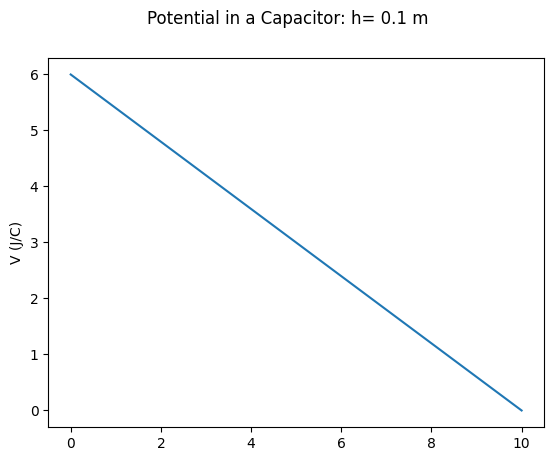

In [ ]:
[x,V]=relaxation(.1,findE=False)


h= 0.1
16686.0  iterations.
0.0001068119881936957 seconds per iteration
1.7822648350000065 total time

E field strength range: 0.0006361367229912318 N/C


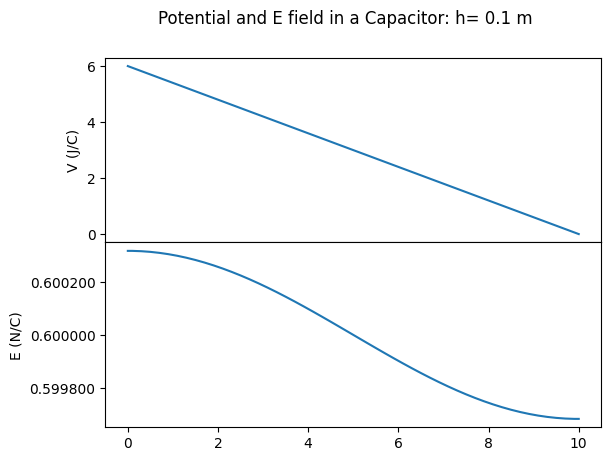

In [ ]:
[x,V]=relaxation(0.1)


Your mission is to **test the three different relax functions** and determine which way is slowest and which way is fastest.  

**If you added any print statments to the new relax function, don't forget to comment them out or delete them!**

Be sure to try out several values of h for each function. Remember that we found that runtime depends on several factors, including h, the error tolerance for the while loop, and some things we can't control such as the load on whatever server is running this program.

**Organize your runtime data neatly in this notebook and write a few sentences summarizing your conclusions.**

If you would like, feel free to modify the relaxation function so that it returns the runtime data in a format you like better.  If you're interested in writing some code to organize your data and make it look tidy, I think the python library [tabulate](https://pypi.org/project/tabulate/) is pretty neat.  

If you prefer to copy and paste your data into text cells and then use mark-up, check out these options:

Text cells in Colab can be formatted with [markdown, which includes pretty tables, too.](https://www.codecademy.com/resources/docs/markdown/tables)


\begin{array}{r|lcc}
        \text{You} & \text{can} & \text{also} &\text{make} \\
        \hline
        \text{tables} &\text{using} & \LaTeX &\text{in} \\
        \text{Colab}, &\text{though} & \text{they} &\text{are} \\
         \text{rather} &\text{limited} & \text{compared} &\text{to} \\
                  \text{the} &\text{real} & \text{thing} &\text{!} \\
        9038 & 0.8348 & 11293 & 39402 \\
        8675309 & 3090.203 & 0.2934 & 7 \\
\end{array}




Relaxation Method 1 (For Loop):
h= 0.1
16686.0  iterations.
7.164354428862408e-05 seconds per iteration
1.1954441799999813 total time

E field strength range: 0.0006361367229912318 N/C
Relaxation Method 2 (np.roll):
h= 0.1
16686.0  iterations.
3.8114396380193196e-05 seconds per iteration
0.6359768179999037 total time

Relaxation Method 3 (Vectorized Calculation):
h= 0.1
16686.0  iterations.
3.54094264653031e-05 seconds per iteration
0.5908416900000475 total time

E field strength range: 0.0006361367229912318 N/C


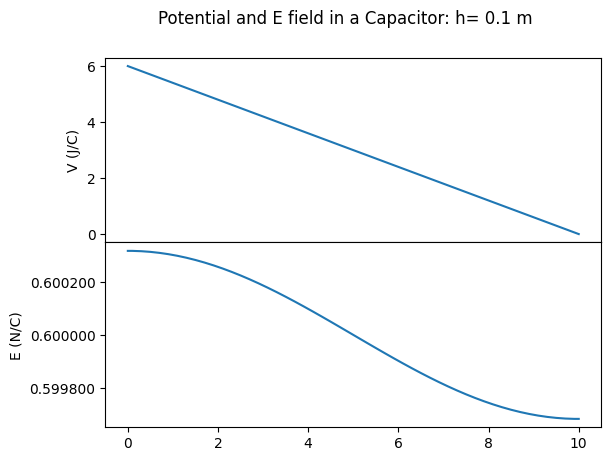

Relaxation Method 1 (For Loop):
h= 0.05
55512.0  iterations.
3.633478388456439e-05 seconds per iteration
2.0170165229999384 total time

E field strength range: 0.0025457463539371172 N/C
Relaxation Method 2 (np.roll):
h= 0.05
55512.0  iterations.
3.723531306744469e-05 seconds per iteration
2.0670066989999896 total time

Relaxation Method 3 (Vectorized Calculation):
h= 0.05
55512.0  iterations.
4.323951147499661e-05 seconds per iteration
2.4003117610000118 total time

E field strength range: 0.0025457463539371172 N/C


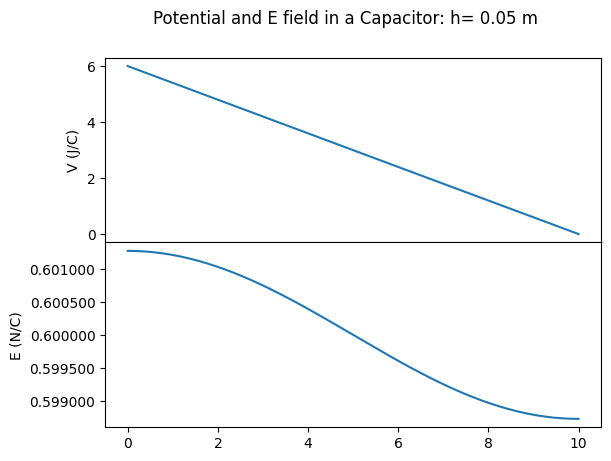

Relaxation Method 1 (For Loop):
h= 0.01
735518.0  iterations.
4.6230914120388586e-05 seconds per iteration
34.00366949199997 total time

E field strength range: 0.06366164111326444 N/C
Relaxation Method 2 (np.roll):
h= 0.01
735518.0  iterations.
4.217951527087022e-05 seconds per iteration
31.02379271299992 total time

Relaxation Method 3 (Vectorized Calculation):
h= 0.01
735518.0  iterations.
4.482552936161998e-05 seconds per iteration
32.969983705000004 total time

E field strength range: 0.06366164111326444 N/C


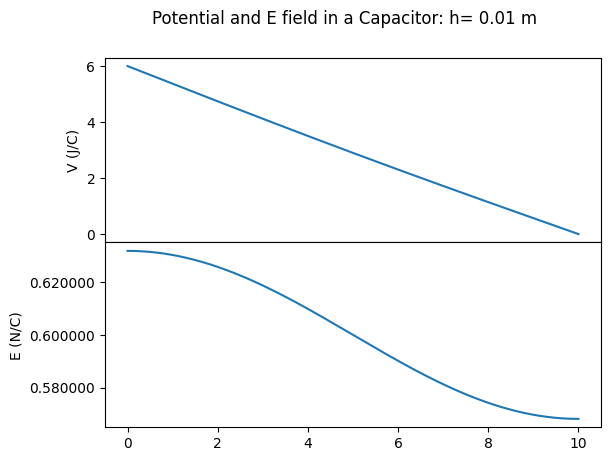

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import time

def relaxWithForLoop(V):
    Vnew = np.copy(V)
    for i in range(1, V.size - 1):
        Vnew[i] = (V[i - 1] + V[i + 1]) / 2.
    err = np.max(np.abs(Vnew - V))
    return [Vnew, err]

def relaxWithRoll(V):
    V1 = np.roll(V, 1)
    V2 = np.roll(V, -1)
    Vrelaxxed = (V1 + V2) / 2.
    Vrelaxxed[0] = V0
    Vrelaxxed[-1] = 0
    err = np.max(np.abs(Vrelaxxed - V))
    return [Vrelaxxed, err]

def relax(V):
    Vminus = np.append(np.delete(V, 1), [V[-1]])
    Vplus = np.append([V[0]], np.delete(V, -2))
    Vnew = (Vminus + Vplus) / 2.
    err = np.max(np.abs(Vnew - V))
    return [Vnew, err]

def relaxation(h, findE=True, showPlot=True):
    # h = spacing between x points.
    a = 10.  # Range in meters.
    n = int(a / h + 1.)

    x = np.linspace(0, a, num=n)

    Vstart = np.zeros_like(x)
    V0 = 6.
    Vstart[0] = V0

    V = Vstart[:]
    err = 1
    j = 1.

    tic = time.perf_counter()
    while err > 1e-6:
        j += 1.
        [V, err] = relax(V)
    toc = time.perf_counter()
    dt = toc - tic

    print("h=", h)
    print(j, " iterations.")
    print(dt / j, "seconds per iteration")
    print(dt, "total time")
    print()

    if findE:
        Ex = -np.gradient(V, h)
        print('E field strength range:', np.max(Ex) - np.min(Ex), 'N/C')

    if showPlot:
        if findE:
            title = ' '.join(['Potential and E field in a Capacitor: h=', str(h), 'm'])
            fig, axs = plt.subplots(2, 1, sharex=True)
            # Remove vertical space between axes
            fig.subplots_adjust(hspace=0)

        else:
            title = ' '.join(['Potential in a Capacitor: h=', str(h), 'm'])
            fig, axs = plt.subplots()

        fig.suptitle(title)

        if findE:

            axs[0].plot(x, V)
            axs[0].set_ylabel('V (J/C)')

            axs[1].plot(x, Ex)
            axs[1].set_ylabel('E (N/C)')
            # This fixes a weird y-axis tick labeling problem
            axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.6f}"))

            axs[1].xlabel = 'x (m)'

        else:

            axs.plot(x, V)
            axs.set_ylabel('V (J/C)')
            axs.xlabel = 'x (m)'

        plt.show()

    return x, V

# Test relaxation methods with different values of h
hs = [0.1, 0.05, 0.01]
for h in hs:
    print("Relaxation Method 1 (For Loop):")
    [x, V] = relaxation(h, showPlot=False)
    print("Relaxation Method 2 (np.roll):")
    [x, V] = relaxation(h, findE=False, showPlot=False)
    print("Relaxation Method 3 (Vectorized Calculation):")
    [x, V] = relaxation(h)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import time
from tabulate import tabulate

def relaxWithForLoop(V):
    Vnew = np.copy(V)
    for i in range(1, V.size - 1):
        Vnew[i] = (V[i - 1] + V[i + 1]) / 2.
    err = np.max(np.abs(Vnew - V))
    return [Vnew, err]

def relaxWithRoll(V):
    V1 = np.roll(V, 1)
    V2 = np.roll(V, -1)
    Vrelaxxed = (V1 + V2) / 2.
    Vrelaxxed[0] = V0
    Vrelaxxed[-1] = 0
    err = np.max(np.abs(Vrelaxxed - V))
    return [Vrelaxxed, err]

def relax(V):
    Vminus = np.append(np.delete(V, 1), [V[-1]])
    Vplus = np.append([V[0]], np.delete(V, -2))
    Vnew = (Vminus + Vplus) / 2.
    err = np.max(np.abs(Vnew - V))
    return [Vnew, err]

def relaxation(h, findE=True, showPlot=True):
    # h = spacing between x points.
    a = 10.  # Range in meters.
    n = int(a / h + 1.)

    x = np.linspace(0, a, num=n)

    Vstart = np.zeros_like(x)
    V0 = 6.
    Vstart[0] = V0

    V = Vstart[:]
    err = 1
    j = 1.

    tic = time.perf_counter()
    while err > 1e-6:
        j += 1.
        [V, err] = relax(V)
    toc = time.perf_counter()
    dt = toc - tic

    if findE:
        Ex = -np.gradient(V, h)

    return j, dt / j, dt

# Test relaxation methods with different values of h
hs = [0.1, 0.05, 0.01]

results = []
for h in hs:
    # For Loop
    iterations, time_per_iteration, total_time = relaxation(h, showPlot=False)
    results.append(["For Loop", h, iterations, time_per_iteration, total_time])

    # np.roll
    iterations, time_per_iteration, total_time = relaxation(h, findE=False, showPlot=False)
    results.append(["np.roll", h, iterations, time_per_iteration, total_time])

    # Vectorized Calculation
    iterations, time_per_iteration, total_time = relaxation(h)
    results.append(["Vectorized Calculation", h, iterations, time_per_iteration, total_time])

# Display results in a table
print(tabulate(results, headers=["Method", "h", "Iterations", "Time per Iteration (s)", "Total Time (s)"], tablefmt="grid"))


+------------------------+------+--------------+--------------------------+------------------+
| Method                 |    h |   Iterations |   Time per Iteration (s) |   Total Time (s) |
+========================+======+==============+==========================+==================+
| For Loop               | 0.1  |        16686 |              3.26689e-05 |         0.545113 |
+------------------------+------+--------------+--------------------------+------------------+
| np.roll                | 0.1  |        16686 |              3.13641e-05 |         0.523342 |
+------------------------+------+--------------+--------------------------+------------------+
| Vectorized Calculation | 0.1  |        16686 |              3.39332e-05 |         0.56621  |
+------------------------+------+--------------+--------------------------+------------------+
| For Loop               | 0.05 |        55512 |              3.3967e-05  |         1.88558  |
+------------------------+------+--------------+--